In [1]:
import pandas as pd
vehicle = "/kaggle/input/vehicle-sales-data/car_prices.csv"
vehicleSale = pd.read_csv(vehicle)

vehicleSale.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [2]:
print("Shape of the dataset", vehicleSale.shape)

Shape of the dataset (558837, 16)


# Check the Manufactured Year and its distribution

Loaded CSV with 558837 rows
Year range: 1982 to 2015
Total vehicles from 1982–1999: 9533
Total vehicles from 1982–2015: 558837
Percentage of 1982–1999 vehicles: 1.71%


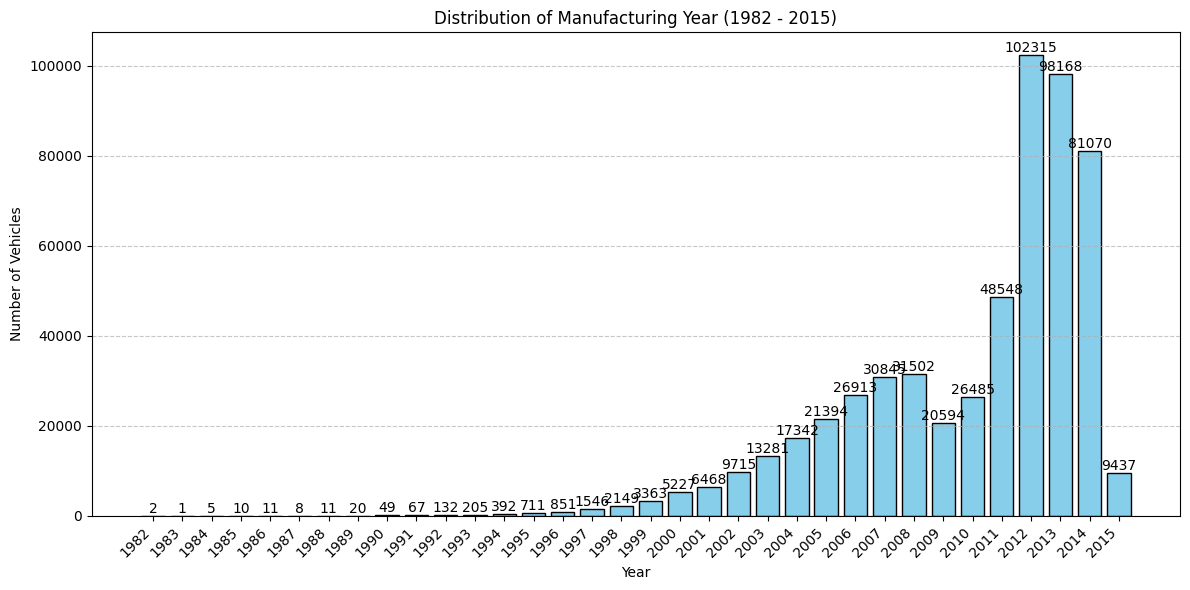

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV
# vehicleSale = pd.read_csv('car_sales_data.csv')
print(f"Loaded CSV with {len(vehicleSale)} rows")

# Step 2: Validate the 'year' column
if 'year' not in vehicleSale.columns:
    print("Error: 'year' column not found")
    exit()
if vehicleSale['year'].isnull().any():
    print(f"Warning: {vehicleSale['year'].isnull().sum()} missing values in 'year'")
    vehicleSale = vehicleSale.dropna(subset=['year'])  # Drop rows with missing year
vehicleSale['year'] = vehicleSale['year'].astype(int)  # Ensure integer type
print(f"Year range: {vehicleSale['year'].min()} to {vehicleSale['year'].max()}")

# Step 3: Calculate year distribution
year_counts = vehicleSale['year'].value_counts().sort_index()
# print("\nYear distribution:")
# print(year_counts)

#Check the contribution of vehicles from 1982 -1999
vehicles_82s = year_counts.loc[1982:1999].sum()
vehicles_total = len(vehicleSale)  # or use year_counts.loc[1982:2015].sum()

percentage_82s = (vehicles_82s / vehicles_total) * 100

print(f"Total vehicles from 1982–1999: {vehicles_82s}")
print(f"Total vehicles from 1982–2015: {vehicles_total}")
print(f"Percentage of 1982–1999 vehicles: {percentage_82s:.2f}%")


# Step 4: Create bar chart with value labels
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Manufacturing Year (1982 - 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(ticks=year_counts.index, rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of bar
        height,  # Top of bar
        f'{int(height)}',  # Count as integer
        ha='center', va='bottom', fontsize=10
    )

# Step 5: Save and show plot
plt.tight_layout()
plt.savefig('year_distribution.png')
# print("\nBar chart saved as 'year_distribution.png'")
plt.show()

# check columns with null value

In [4]:
vehicleSale.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

# Remove row data with empty column

In [5]:
#Drop rows that contains empty  columns
vehicleSale = vehicleSale.dropna(subset =['make', 'model','trim','body','vin',"condition", 'color', 'interior','sellingprice', 'odometer', 'saledate', 'mmr'])
vehicleSale.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission    61323
vin                 0
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [6]:
vehicleSale.shape

(533648, 16)

# Fill the null value of transmission column with Unknown

In [7]:
vehicleSale['transmission'] = vehicleSale['transmission'].fillna('Unknown')
vehicleSale.shape

(533648, 16)

#  Manufacturing Year distribution of the Vehicles after droping null values

Loaded CSV with 533648 rows
Year range: 1990 to 2015
Total vehicles from 1982–1999: 7411
Total vehicles from 1982–2015: 533648
Percentage of 1982–1999 vehicles: 1.39%


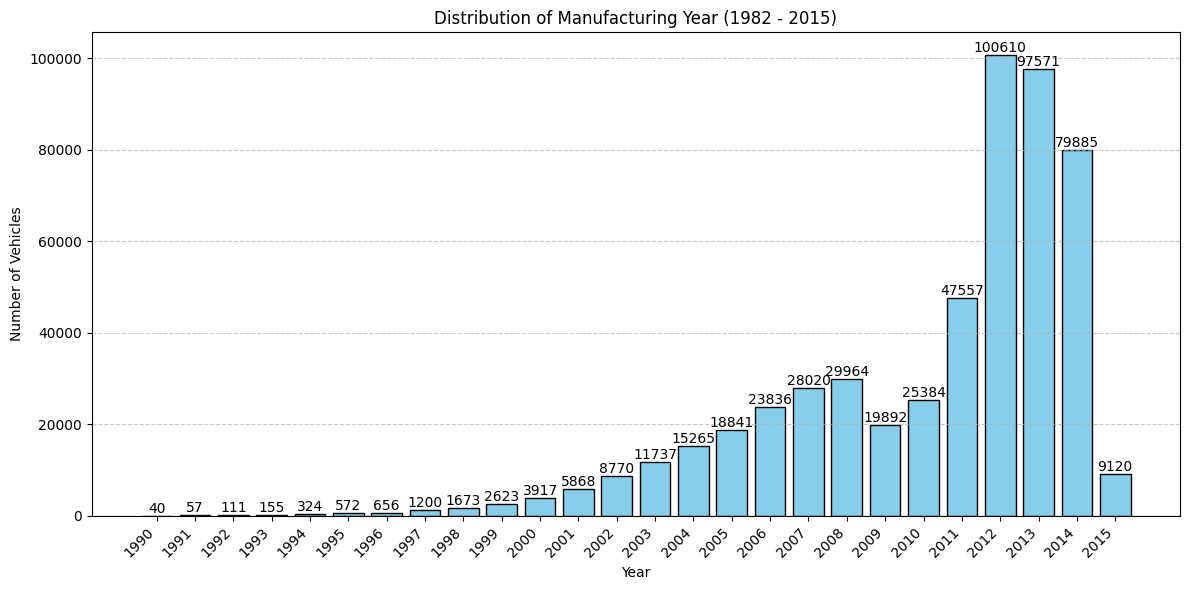

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV
# vehicleSale = pd.read_csv('car_sales_data.csv')
print(f"Loaded CSV with {len(vehicleSale)} rows")

# Step 2: Validate the 'year' column
if 'year' not in vehicleSale.columns:
    print("Error: 'year' column not found")
    exit()
if vehicleSale['year'].isnull().any():
    print(f"Warning: {vehicleSale['year'].isnull().sum()} missing values in 'year'")
    vehicleSale = vehicleSale.dropna(subset=['year'])  # Drop rows with missing year
vehicleSale['year'] = vehicleSale['year'].astype(int)  # Ensure integer type
print(f"Year range: {vehicleSale['year'].min()} to {vehicleSale['year'].max()}")

# Step 3: Calculate year distribution
year_counts = vehicleSale['year'].value_counts().sort_index()
# print("\nYear distribution:")
# print(year_counts)

#Check the contribution of vehicles from 1982 -1999
vehicles_82s = year_counts.loc[1982:1999].sum()
vehicles_total = len(vehicleSale)  # or use year_counts.loc[1982:2015].sum()

percentage_82s = (vehicles_82s / vehicles_total) * 100

print(f"Total vehicles from 1982–1999: {vehicles_82s}")
print(f"Total vehicles from 1982–2015: {vehicles_total}")
print(f"Percentage of 1982–1999 vehicles: {percentage_82s:.2f}%")


# Step 4: Create bar chart with value labels
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Manufacturing Year (1982 - 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(ticks=year_counts.index, rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of bar
        height,  # Top of bar
        f'{int(height)}',  # Count as integer
        ha='center', va='bottom', fontsize=10
    )

# Step 5: Save and show plot
plt.tight_layout()
plt.savefig('year_distribution.png')
# print("\nBar chart saved as 'year_distribution.png'")
plt.show()

# Take Year from 2000 - 2015

In [9]:
vehicleSale = vehicleSale[vehicleSale['year'].between(2000, 2015)]
vehicleSale['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

Loaded CSV with 526237 rows

Filtered data (2000–2015): 526237 rows
Year range: 2000 to 2015


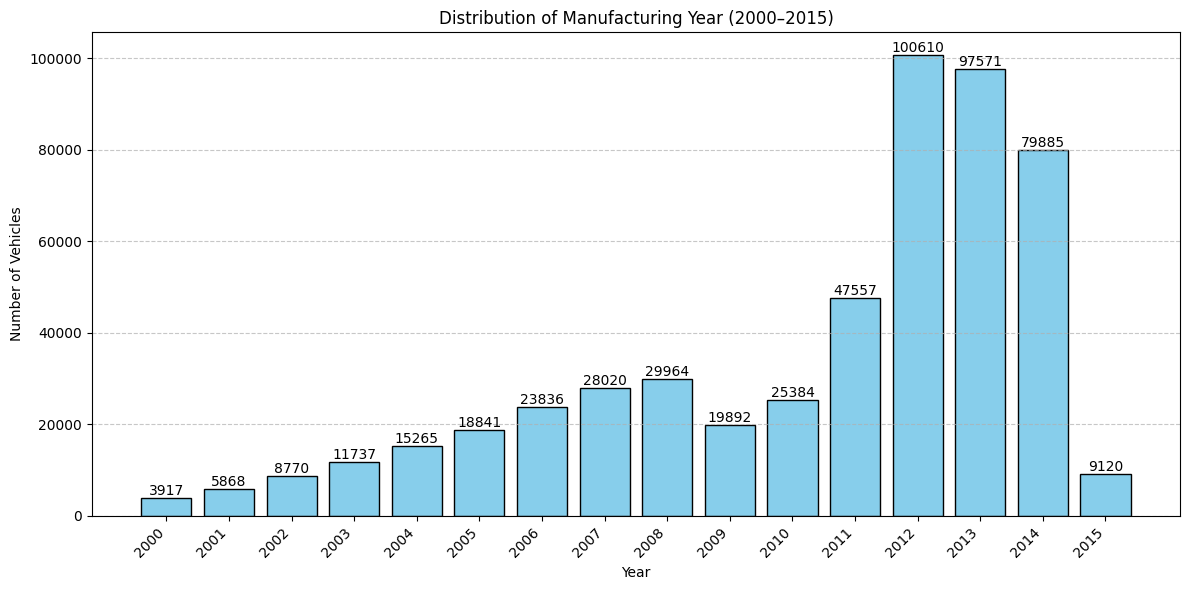

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV
# vehicleSale = pd.read_csv('car_sales_data.csv')
print(f"Loaded CSV with {len(vehicleSale)} rows")

# Step 2: Validate and filter the 'year' column
if 'year' not in vehicleSale.columns:
    print("Error: 'year' column not found")
    exit()
if vehicleSale['year'].isnull().any():
    print(f"Warning: {vehicleSale['year'].isnull().sum()} missing values in 'year'")
    vehicleSale = vehicleSale.dropna(subset=['year'])
vehicleSale['year'] = vehicleSale['year'].astype(int)

# Filter for 2000–2015 (change to 2005 for alternative)

start_year = 2000  # Change to 2005 for alternative
end_year = 2015
vehicleSale_filtered = vehicleSale[(vehicleSale['year'] >= start_year) & (vehicleSale['year'] <= end_year)]
print(f"\nFiltered data ({start_year}–{end_year}): {len(vehicleSale_filtered)} rows")
print(f"Year range: {vehicleSale_filtered['year'].min()} to {vehicleSale_filtered['year'].max()}")

# Step 3: Calculate year distribution
year_counts = vehicleSale_filtered['year'].value_counts().sort_index()
# print("\nYear distribution:")
# print(year_counts)

# Step 4: Create bar chart with value labels
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Manufacturing Year ({start_year}–{end_year})')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(ticks = year_counts.index, rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

# Step 5: Save and show plot
plt.tight_layout()
plt.savefig(f'year_distribution_{start_year}_{end_year}.png')
# print(f"\nBar chart saved as 'year_distribution_{start_year}_{end_year}.png'")
plt.show()

In [11]:
vehicleSale.shape

(526237, 16)

# **Check VIN Length Consistency**

In [12]:
# Keep only rows where VIN is exactly 17 characters
vehicleSale = vehicleSale[vehicleSale['vin'].astype(str).str.len() == 17]

print(f"Remaining rows after dropping invalid VINs: {len(vehicleSale)}")


Remaining rows after dropping invalid VINs: 526237


# **Standardization of string value columns**

In [13]:
import pandas as pd

# Standardize string columns
string_cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'seller']
for col in string_cols:
    vehicleSale[col] = vehicleSale[col].str.title().str.strip()
    print(f"Standardized {col}")

# Handle vin and state separately
vehicleSale['vin'] = vehicleSale['vin'].str.strip()
vehicleSale['state'] = vehicleSale['state'].str.upper().str.strip()

# Save cleaned CSV
#vehicleSale.to_csv('car_sales_cleaned.csv', index=False)

Standardized make
Standardized model
Standardized trim
Standardized body
Standardized transmission
Standardized color
Standardized interior
Standardized seller


# Check duplicated VIN

1. **Remove Unintended Sale Duplicates**
* Objective: Eliminate duplicate sale records (same vin, saledate, seller) that represent data errors.
2. **Validate Multi-Sales**
* Objective: Confirm valid cases where vehicles (same vin) are sold multiple times (different saledate or seller).
3. **Resolve Vehicle Attribute Duplicates**
* Objective: Ensure consistent vehicle attributes (make, model, trim, body, year, transmission, color, interior) for each vin for reconciled.vehicle.

In [14]:
import pandas as pd

# Step 1: Check for unintended sale duplicates (same vin, saledate, seller)
sale_duplicates = vehicleSale.duplicated(subset=['vin', 'saledate', 'seller'], keep=False)
if sale_duplicates.sum() > 0:
    print(f"\nFound {sale_duplicates.sum()} unintended sale duplicates (same vin, saledate, seller):")
    print(vehicleSale[sale_duplicates][['vin', 'saledate', 'seller', 'sellingprice']].sort_values(['vin', 'saledate']).head(10))
   
    # Remove duplicates, keep first occurrence
    vehicleSale = vehicleSale.drop_duplicates(subset=['vin', 'saledate', 'seller'], keep='first')
    print(f"Removed unintended duplicates. Remaining rows: {len(vehicleSale)}")
else:
    print("\nNo unintended sale duplicates found (same vin, saledate, seller).")

# Step 2: Check for valid multi-sales (same vin, different saledate or seller)

vin_counts = vehicleSale['vin'].value_counts()
multi_sales = vin_counts[vin_counts > 1]
if not multi_sales.empty:
    print(f"\nFound {len(multi_sales)} VINs with multiple sales (valid):")
    print(multi_sales.head(10))
   
    # Example of multi-sales
    multi_sale_vins = multi_sales.index[:2]
    print("\nSample multi-sale details:")
    print(vehicleSale[vehicleSale['vin'].isin(multi_sale_vins)][['vin', 'saledate', 'seller', 'sellingprice']].sort_values(['vin', 'saledate']))
else:
    print("\nNo VINs with multiple sales found.")

# Step 3: Check for vehicle attribute duplicates (same vin, different attributes)

vehicle_cols = ['vin', 'make', 'model', 'trim', 'body', 'year', 'transmission', 'color', 'interior']
vehicle_duplicates = vehicleSale[vehicle_cols].duplicated(subset=['vin'], keep=False)

if vehicle_duplicates.sum() > 0:
    print(f"\nFound {vehicle_duplicates.sum()} rows with potential vehicle attribute duplicates (same vin, different attributes):")
    print(vehicleSale[vehicle_cols][vehicle_duplicates].sort_values('vin').head(10))
    
    # Resolve: Keep first occurrence
    vehicleSale_vehicle = vehicleSale[vehicle_cols].drop_duplicates(subset=['vin'], keep='first')
    print(f"Unique vehicle records: {len(vehicleSale_vehicle)}")
   
    # Merge back to keep only consistent vehicle attributes
    vehicleSale_unique = vehicleSale.drop(columns=vehicle_cols[1:]).merge(vehicleSale_vehicle, on='vin', how='left')
    print(f"Resolved vehicle duplicates. Remaining rows: {len(vehicleSale_unique)}")
else:
    print("\nNo vehicle attribute duplicates found (all VINs have consistent attributes).")

# Step 4: Save cleaned CSV
#vehicleSale.to_csv('car_sales_cleaned.csv', index=False)
#print(f"\nSaved cleaned CSV: car_sales_cleaned.csv")
print(f"Final rows: {len(vehicleSale_unique)}, Unique VINs: {vehicleSale_unique['vin'].nunique()}")


Found 96 unintended sale duplicates (same vin, saledate, seller):
                      vin                                 saledate  \
42482   19xfb2f97ce313922  Tue Feb 03 2015 01:30:00 GMT-0800 (PST)   
242292  19xfb2f97ce313922  Tue Feb 03 2015 01:30:00 GMT-0800 (PST)   
17667   1b3hb48bx7d113596  Thu Jan 22 2015 04:30:00 GMT-0800 (PST)   
185650  1b3hb48bx7d113596  Thu Jan 22 2015 04:30:00 GMT-0800 (PST)   
372837  1b4hr28y7yf116252  Tue Mar 03 2015 02:00:00 GMT-0800 (PST)   
379249  1b4hr28y7yf116252  Tue Mar 03 2015 02:00:00 GMT-0800 (PST)   
59819   1b7gg22n01s348630  Thu Jan 22 2015 03:00:00 GMT-0800 (PST)   
187304  1b7gg22n01s348630  Thu Jan 22 2015 03:00:00 GMT-0800 (PST)   
483983  1d4se4gt5bc746627  Wed Jul 08 2015 07:20:00 GMT-0700 (PDT)   
546091  1d4se4gt5bc746627  Wed Jul 08 2015 07:20:00 GMT-0700 (PDT)   

                                                 seller  sellingprice  
42482                       Auto Equity Loans Of De Llc        3900.0  
242292            

In [15]:
vehicleSale_unique.head()

,vin,state,condition,odometer,seller,mmr,sellingprice,saledate,make,model,trim,body,year,transmission,color,interior
0,5xyktca69fg566472,CA,5.0,16639.0,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Black
1,5xyktca69fg561319,CA,5.0,9393.0,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Beige
2,wba3c1c51ek116351,CA,45.0,1331.0,Financial Services Remarketing (Lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Bmw,3 Series,328I Sulev,Sedan,2014,Automatic,Gray,Black
3,yv1612tb4f1310987,CA,41.0,14282.0,Volvo Na Rep/World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo,S60,T5,Sedan,2015,Automatic,White,Black
4,wba6b2c57ed129731,CA,43.0,2641.0,Financial Services Remarketing (Lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Bmw,6 Series Gran Coupe,650I,Sedan,2014,Automatic,Gray,Black


# Check Invalid values in model, body, seller, 

In [16]:
suspicious_body = vehicleSale[vehicleSale['body'].str.match(r'^[^a-zA-Z\s-]+$', na=False)]
print('Invalid body:', suspicious_body['body'].unique())

suspicious_model = vehicleSale[vehicleSale['model'].str.match(r'^[^a-zA-Z0-9\s-]+$', na=False) | vehicleSale['model'].str.match(r'^\d+$', na=False)]
print('Invalid model:', suspicious_model['model'].unique())

suspicious_seller = vehicleSale[vehicleSale['seller'].str.match(r'^[^a-zA-Z0-9\s.,&-]+$', na=False)]
print('Invalid seller:', suspicious_seller['seller'].unique())

suspicious_trims = vehicleSale[vehicleSale['trim'].str.match(r'^[^a-zA-Z0-9]+$', na=False) | vehicleSale['trim'].str.match(r'^\d+$', na=False)]
print('Invalid trim:', suspicious_trims['trim'].unique())

# Null and Placeholder Detection
for col in ['body', 'model', 'seller', 'trim']:
    invalid = vehicleSale[vehicleSale[col].isna() | (vehicleSale[col] == '') | vehicleSale[col].str.lower().isin(['n/a', 'unknown', 'none'])]
    print(f'Invalid {col}:', invalid[col].unique(), f'Count: {len(invalid)}')

Invalid body: []
Invalid model: ['911' '500' '200' '300' '1500' '2500' '3500' '6' '626' '3' '360']
Invalid seller: []
Invalid trim: ['+' '1500' '2' '4' '2500' '!' '3500' '3' '1' '1794' '5' '427' '85' '60']
Invalid body: [] Count: 0
Invalid model: [] Count: 0
Invalid seller: [] Count: 0
Invalid trim: [] Count: 0


# check transmission column values

In [17]:
#count vehicles with specific transimisiion to check valid transmission
transimission_counts = vehicleSale_unique['transmission'].value_counts()
print(transimission_counts)

transmission
Automatic    450011
Unknown       60447
Manual        15731
Name: count, dtype: int64


# Check interior column values

In [18]:
#count vehicles with specific interior to check valid interior
interior_counts = vehicleSale_unique['interior'].value_counts()
print(interior_counts)

interior
Black        238039
Gray         167169
Beige         56541
Tan           40380
—             10961
Brown          8142
Red            1265
Silver         1036
Blue            801
Off-White       474
Purple          308
Gold            305
White           239
Green           208
Burgundy        168
Orange          135
Yellow           18
Name: count, dtype: int64


In [19]:
vehicleSale_unique.shape

(526189, 16)

# Remove invalid values in interior column

In [20]:
# Remove rows where interior is just a dash or em dash
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['interior'].str.strip() != '—']

#count vehicles with specific interior to check valid color
interior_counts = vehicleSale_unique['interior'].value_counts()
print(interior_counts)

interior
Black        238039
Gray         167169
Beige         56541
Tan           40380
Brown          8142
Red            1265
Silver         1036
Blue            801
Off-White       474
Purple          308
Gold            305
White           239
Green           208
Burgundy        168
Orange          135
Yellow           18
Name: count, dtype: int64


In [21]:
vehicleSale_unique.shape

(515228, 16)

# Check color column values 

In [22]:
#count vehicles with specific color to check valid color
color_counts = vehicleSale_unique['color'].value_counts()
print(color_counts)

color
Black        103428
White         98092
Gray          77963
Silver        77018
Blue          46663
Red           39993
—             24395
Gold           9643
Green          9118
Burgundy       8123
Beige          8058
Brown          6254
Orange         1871
Purple         1386
Off-White      1361
Yellow         1155
Charcoal        460
Turquoise       197
Pink             37
Lime             13
Name: count, dtype: int64


# remove color with invalid value

In [23]:
#remove color with - value
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['color'].str.strip() != 'â€”']
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['color'].str.strip() != '—']

#count vehicles with specific color to check valid color
color_counts = vehicleSale_unique['color'].value_counts()
print(color_counts)

color
Black        103428
White         98092
Gray          77963
Silver        77018
Blue          46663
Red           39993
Gold           9643
Green          9118
Burgundy       8123
Beige          8058
Brown          6254
Orange         1871
Purple         1386
Off-White      1361
Yellow         1155
Charcoal        460
Turquoise       197
Pink             37
Lime             13
Name: count, dtype: int64


In [24]:
vehicleSale_unique.shape

(490833, 16)

# Check invalid input in trim column

In [25]:
print(vehicleSale_unique['trim'].unique())

['Lx' '328I Sulev' 'T5' ... '4.2 Quattro Spyder' 'Ewb' 'Power Wagon']


In [26]:
print(vehicleSale_unique['trim'].value_counts(dropna=False))

trim
Base                     49141
Se                       38093
Lx                       19203
Limited                  16255
Lt                       15974
                         ...  
Comfort                      1
Cxl Plus                     1
3500 High Roof 158 Wb        1
Mv                           1
Ex35 Journey                 1
Name: count, Length: 1398, dtype: int64


In [27]:
import re

# Example: trim values that are only 1 character or contain only non-alphanumeric characters
suspicious_trims = vehicleSale_unique[vehicleSale_unique['trim'].str.match(r'^[^a-zA-Z0-9]+$', na=False)]
print('Invalid values in trim:', suspicious_trims['trim'].unique())


Invalid values in trim: ['+' '!']


# Remove the invalid input in trim column

In [28]:
#Check invalid input in trim column
count_garbage1 = (vehicleSale_unique['trim'] == '+' ).sum()
count_garbage2 = (vehicleSale_unique['trim'] == '!' ).sum()
count_garbage = count_garbage1 + count_garbage2
print('Invalid trim: ',count_garbage)

#drop data with + and ! trim values
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['trim'].str.strip() != '+']
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['trim'].str.strip() != '!']

Invalid trim:  2005


In [29]:
#Check if removed successfully
count_garbage1 = (vehicleSale_unique['trim'] == '+' ).sum()
count_garbage2 = (vehicleSale_unique['trim'] == '!' ).sum()
count_garbage = count_garbage1 + count_garbage2
print('Invalid trim:', count_garbage)

Invalid trim: 0


In [30]:
vehicleSale_unique.shape

(488828, 16)

# Data Cleaning regarding odometer and sellingprice 
Issues Identified:

Odometer outliers: Some values are extremely high (e.g., 999999) or suspiciously low (e.g., 31 miles)

Price outliers: Some selling prices seem unrealistic (e.g., $1000 for a 2013 Nissan Maxima)

In [31]:
print("Original rows:", len(vehicleSale_unique))
# 1. Clean odometer readings
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['odometer'] < 200000]  # Remove unrealistic high mileage
print("After odometer filter:", len(vehicleSale_unique))

# 2. Clean price range
vehicleSale_unique = vehicleSale_unique[(vehicleSale_unique['sellingprice'] > 1000) & (vehicleSale_unique['sellingprice'] < 200000)]
print("After sellingprice filter:", len(vehicleSale_unique))

# 3. Clean mmr range
vehicleSale_unique = vehicleSale_unique[(vehicleSale_unique['mmr'] > 1000) & (vehicleSale_unique['mmr'] < 200000)]
print("After mmr filter:", len(vehicleSale_unique))


vehicleSale_unique.head()

Original rows: 488828
After odometer filter: 480851
After sellingprice filter: 472999
After mmr filter: 472199


,vin,state,condition,odometer,seller,mmr,sellingprice,saledate,make,model,trim,body,year,transmission,color,interior
0,5xyktca69fg566472,CA,5.0,16639.0,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Black
1,5xyktca69fg561319,CA,5.0,9393.0,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Beige
2,wba3c1c51ek116351,CA,45.0,1331.0,Financial Services Remarketing (Lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Bmw,3 Series,328I Sulev,Sedan,2014,Automatic,Gray,Black
3,yv1612tb4f1310987,CA,41.0,14282.0,Volvo Na Rep/World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo,S60,T5,Sedan,2015,Automatic,White,Black
4,wba6b2c57ed129731,CA,43.0,2641.0,Financial Services Remarketing (Lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Bmw,6 Series Gran Coupe,650I,Sedan,2014,Automatic,Gray,Black


In [32]:
vehicleSale_unique.shape

(472199, 16)

# **Check condition column distribution and create a catagory**

In [33]:
print(vehicleSale_unique['condition'].value_counts())

# Step 1: Get min and max values of the condition column
min_condition = vehicleSale_unique['condition'].min()
max_condition = vehicleSale_unique['condition'].max()
print(f"Min condition: {min_condition}, Max condition: {max_condition}")

condition
19.0    31408
35.0    24190
37.0    23440
44.0    22796
43.0    22376
42.0    21966
36.0    21066
41.0    20830
4.0     18462
39.0    18032
28.0    16973
38.0    16956
29.0    16794
34.0    15720
27.0    14179
2.0     13166
49.0    11403
46.0    11172
48.0    11152
45.0    10937
25.0    10753
26.0    10335
5.0     10009
47.0     9996
33.0     9582
3.0      9276
32.0     8979
31.0     8259
24.0     7945
21.0     7619
23.0     6880
22.0     5078
1.0      3571
18.0      235
17.0      160
16.0      124
15.0      104
14.0       90
12.0       68
11.0       61
13.0       57
Name: count, dtype: int64
Min condition: 1.0, Max condition: 49.0


In [34]:
print(vehicleSale['condition'].unique())


[ 5. 45. 41. 43.  1. 34.  2. 42.  3. 48. 49. 17. 19. 29. 38. 44. 47. 32.
  4. 25. 37. 39. 31. 28. 46. 36. 35. 26. 21. 22. 27. 24. 33. 23. 15. 16.
 18. 12. 14. 11. 13.]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


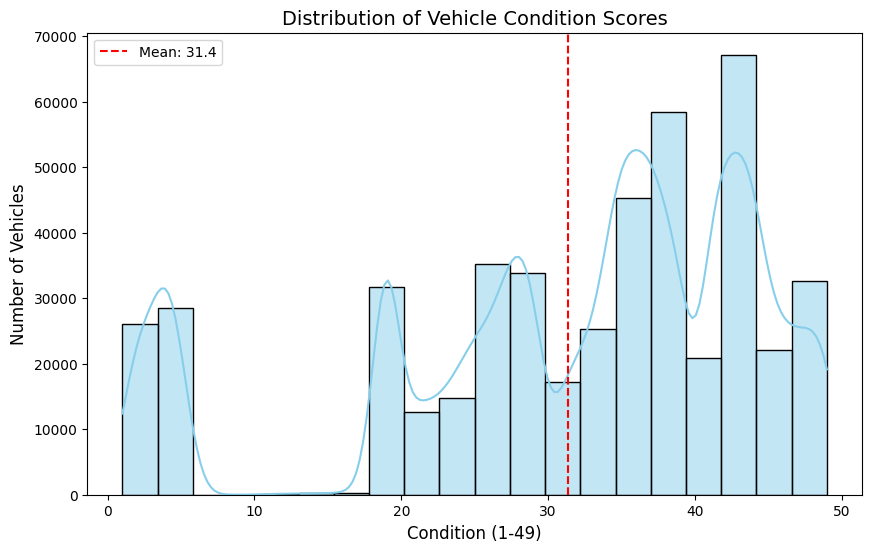

In [35]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(vehicleSale_unique['condition'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Condition Scores', fontsize=14)
plt.xlabel('Condition (1-49)', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.axvline(vehicleSale_unique['condition'].mean(), color='red', linestyle='--', label=f'Mean: {vehicleSale_unique["condition"].mean():.1f}')
plt.legend()
plt.show()

# Create condition catagory

In [36]:
def condition_bin(condition):
    if condition <= 10:
        return 'Poor'
    elif condition <= 20:
        return 'Fair'
    elif condition <= 30:
        return 'Average'
    elif condition <= 40:
        return 'Good'
    else:
        return 'Excellent'
vehicleSale_unique['condition_category'] = vehicleSale_unique['condition'].apply(condition_bin)

vehicleSale_unique.head()


,vin,state,condition,odometer,seller,mmr,sellingprice,saledate,make,model,trim,body,year,transmission,color,interior,condition_category
0,5xyktca69fg566472,CA,5.0,16639.0,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Black,Poor
1,5xyktca69fg561319,CA,5.0,9393.0,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Beige,Poor
2,wba3c1c51ek116351,CA,45.0,1331.0,Financial Services Remarketing (Lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Bmw,3 Series,328I Sulev,Sedan,2014,Automatic,Gray,Black,Excellent
3,yv1612tb4f1310987,CA,41.0,14282.0,Volvo Na Rep/World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo,S60,T5,Sedan,2015,Automatic,White,Black,Excellent
4,wba6b2c57ed129731,CA,43.0,2641.0,Financial Services Remarketing (Lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Bmw,6 Series Gran Coupe,650I,Sedan,2014,Automatic,Gray,Black,Excellent


In [37]:
vehicleSale_unique.shape

(472199, 17)

# Validate state column

In [38]:
us_states_territories = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
    'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
    'VA', 'WA', 'WV', 'WI', 'WY'
]
vehicleSale_unique = vehicleSale_unique[vehicleSale_unique['state'].str.upper().isin(us_states_territories) | vehicleSale_unique['state'].isna()]

# **Exapnd the state code to full State name**

In [39]:
state_abbreviation_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia", "PR": "Puerto Rico", "GU": "Guam", "VI": "Virgin Islands"
}

vehicleSale_unique['state_full_name'] = vehicleSale_unique['state'].map(state_abbreviation_map)
vehicleSale_unique.head()

,vin,state,condition,odometer,seller,mmr,sellingprice,saledate,make,model,trim,body,year,transmission,color,interior,condition_category,state_full_name
0,5xyktca69fg566472,CA,5.0,16639.0,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Black,Poor,California
1,5xyktca69fg561319,CA,5.0,9393.0,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia,Sorento,Lx,Suv,2015,Automatic,White,Beige,Poor,California
2,wba3c1c51ek116351,CA,45.0,1331.0,Financial Services Remarketing (Lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Bmw,3 Series,328I Sulev,Sedan,2014,Automatic,Gray,Black,Excellent,California
3,yv1612tb4f1310987,CA,41.0,14282.0,Volvo Na Rep/World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo,S60,T5,Sedan,2015,Automatic,White,Black,Excellent,California
4,wba6b2c57ed129731,CA,43.0,2641.0,Financial Services Remarketing (Lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Bmw,6 Series Gran Coupe,650I,Sedan,2014,Automatic,Gray,Black,Excellent,California


In [40]:
#check the unique state in the dataset
# Get total number of rows (i.e., total vehicle sales)
total_sales = len(vehicleSale_unique)

# Count sales per state and compute percentage
state_sales_percent = (
    vehicleSale_unique['state'].value_counts()
    .sort_values(ascending=False)
    .apply(lambda x: f"{x}  ({x / total_sales * 100:.2f}%)")
)

# Display result
print(state_sales_percent)
print('Available states: ', len(state_sales_percent))

state
FL    69126  (14.85%)
CA    62360  (13.40%)
PA    48891  (10.50%)
TX     37438  (8.04%)
GA     29783  (6.40%)
NJ     24145  (5.19%)
IL     20792  (4.47%)
OH     18537  (3.98%)
NC     17868  (3.84%)
MI     14541  (3.12%)
TN     14392  (3.09%)
MO     14013  (3.01%)
NV     10418  (2.24%)
VA      9597  (2.06%)
MD      8656  (1.86%)
WI      8156  (1.75%)
MN      7642  (1.64%)
AZ      7441  (1.60%)
CO      7251  (1.56%)
WA      6422  (1.38%)
MA      5403  (1.16%)
NY      4506  (0.97%)
IN      3922  (0.84%)
SC      3557  (0.76%)
NE      3494  (0.75%)
LA      1622  (0.35%)
MS      1584  (0.34%)
UT      1548  (0.33%)
HI      1094  (0.24%)
OR      1037  (0.22%)
NM       104  (0.02%)
OK        49  (0.01%)
AL        23  (0.00%)
Name: count, dtype: object
Available states:  33


# Create a region column based on the US states

In [41]:
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest',

    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South',
    'VA': 'South', 'DC': 'South', 'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South',
    'TN': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',

    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West',
    'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

vehicleSale_unique['region'] = vehicleSale_unique['state'].str.upper().map(state_to_region)

vehicleSale_unique.sample(n=5)


,vin,state,condition,odometer,seller,mmr,sellingprice,saledate,make,model,trim,body,year,transmission,color,interior,condition_category,state_full_name,region
330150,5nmsh13e57h011018,FL,36.0,93726.0,Universal Motors Of Miami Inc,8000.0,8800.0,Tue Mar 10 2015 02:30:00 GMT-0700 (PDT),Hyundai,Santa Fe,Limited,Suv,2007,Automatic,Blue,Gray,Good,Florida,South
85349,2c4rdgcg9er356781,MN,4.0,14172.0,Enterprise Holdings/Gdp,17100.0,17500.0,Wed Jan 14 2015 05:00:00 GMT-0800 (PST),Dodge,Grand Caravan,Sxt,Minivan,2014,Automatic,Blue,Black,Poor,Minnesota,Midwest
36788,5yfburhe8ep011438,CA,42.0,23520.0,Remarketing By Ge/Manheim Southern California,13400.0,12000.0,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),Toyota,Corolla,Le,Sedan,2014,Automatic,White,Gray,Excellent,California,West
359429,yv1672mk9d2308561,WA,46.0,18695.0,Volvo Na Lease/World Omni,19400.0,22200.0,Wed Mar 04 2015 05:30:00 GMT-0800 (PST),Volvo,C30,T5,Hatchback,2013,Automatic,White,Gray,Excellent,Washington,West
514789,1gcek19z75z271566,NC,19.0,173402.0,Rick Hendrick Chevrolet Buick Gmc,5350.0,7300.0,Mon Jun 15 2015 02:15:00 GMT-0700 (PDT),Chevrolet,Silverado 1500,Base,Extended Cab,2005,Automatic,Burgundy,Gray,Fair,North Carolina,South


# Work on make column

In [42]:
#check the unique brand in the dataset
vehicleSale_unique['make'].nunique()

51

# Check invalid input in make column

In [43]:
#check the unique brand in the dataset
# Get total number of rows (i.e., total vehicle sales)
total_sales = len(vehicleSale_unique)

# Count sales per state and compute percentage
make_sales_percent = (
    vehicleSale_unique['make'].value_counts()
    .sort_values(ascending=False)
    .apply(lambda x: f"{x}  ({x / total_sales * 100:.2f}%)")
)

# Display result
print(make_sales_percent)
print('Available make(brand): ', len(make_sales_percent))


make
Ford             75336  (16.19%)
Chevrolet        53292  (11.45%)
Nissan           47537  (10.21%)
Toyota            34515  (7.42%)
Dodge             26745  (5.75%)
Honda             23581  (5.07%)
Hyundai           19799  (4.25%)
Bmw               17672  (3.80%)
Chrysler          14741  (3.17%)
Kia               14675  (3.15%)
Infiniti          13912  (2.99%)
Mercedes-Benz     13796  (2.96%)
Jeep              13590  (2.92%)
Lexus             10502  (2.26%)
Volkswagen        10173  (2.19%)
Gmc                9492  (2.04%)
Mazda              7369  (1.58%)
Cadillac           6523  (1.40%)
Audi               5217  (1.12%)
Acura              5214  (1.12%)
Subaru             4604  (0.99%)
Lincoln            4328  (0.93%)
Ram                4288  (0.92%)
Buick              4211  (0.90%)
Pontiac            3281  (0.70%)
Mitsubishi         3129  (0.67%)
Volvo              3106  (0.67%)
Mini               2437  (0.52%)
Saturn             1961  (0.42%)
Land Rover         1613  (0.35%)
Scion

In [44]:
unique_brand = vehicleSale_unique['make'].nunique()
print("There are ", unique_brand, "make(brands) in the sale data")
print(f"There are {unique_brand} make(brands) in the sale data")

There are  51 make(brands) in the sale data
There are 51 make(brands) in the sale data


In [45]:
vehicleSale_unique.shape

(465412, 19)

In [46]:
# # Add to your script after loading vehicleSale
# make_prices = vehicleSale_unique.groupby('make')['sellingprice'].mean().round(2)
# print("Average sellingprice by make:\n", make_prices.sort_values(ascending=False))

In [47]:
vehicleSale_unique.shape

(465412, 19)

# Create make_catagory column from make 

In [48]:
import pandas as pd

# Instructions: Run in Kaggle or local environment.
# Input: 'car_sales_data.csv' (~465,412 rows after filtering).
# Output: Saves 'car_sales_with_make_category.csv' with make_category column.
# Criteria: Origin (Domestic/Asian/European), Market Segment (Luxury: ≥$20,000 or premium branding, Mainstream: <$20,000), Volume (≥1,000 rows for main, <1,000 for Niche).

# Make category mapping (51 makes)

make_category_map = {
    # Domestic Mainstream (U.S., mainstream, ≥1,000 rows)
    'Ford': 'Domestic Mainstream', 'Chevrolet': 'Domestic Mainstream', 'Dodge': 'Domestic Mainstream',
    'Chrysler': 'Domestic Mainstream', 'Jeep': 'Domestic Mainstream', 'Gmc': 'Domestic Mainstream',
    'Ram': 'Domestic Mainstream', 'Buick': 'Domestic Mainstream', 'Pontiac': 'Domestic Mainstream',
    'Mercury': 'Domestic Mainstream', 'Saturn': 'Domestic Mainstream',
    # Domestic Luxury (U.S., luxury branding, ≥1,000 rows)
    'Cadillac': 'Domestic Luxury', 'Lincoln': 'Domestic Luxury',
    # Asian Mainstream (Asia, mainstream, ≥1,000 rows)
    'Nissan': 'Asian Mainstream', 'Toyota': 'Asian Mainstream', 'Honda': 'Asian Mainstream',
    'Hyundai': 'Asian Mainstream', 'Kia': 'Asian Mainstream', 'Mazda': 'Asian Mainstream',
    'Scion': 'Asian Mainstream', 'Mitsubishi': 'Asian Mainstream', 'Subaru': 'Asian Mainstream',
    'Suzuki': 'Asian Mainstream',
    # Asian Luxury (Asia, luxury or ≥$20,000, ≥1,000 rows)
    'Acura': 'Asian Luxury', 'Lexus': 'Asian Luxury', 'Infiniti': 'Asian Luxury',
    # European Mainstream (Europe, mainstream, ≥1,000 rows)
    'Volkswagen': 'European Mainstream', 'Volvo': 'European Mainstream', 'Mini': 'European Mainstream',
    # European Luxury (Europe, luxury or ≥$20,000, ≥1,000 rows)
    'Bmw': 'European Luxury', 'Mercedes-Benz': 'European Luxury', 'Audi': 'European Luxury',
    'Porsche': 'European Luxury', 'Land Rover': 'European Luxury', 'Jaguar': 'European Luxury',
    # Niche (any origin, <1,000 rows or specialty)
    'Smart': 'Niche', 'Lotus': 'Niche', 'Isuzu': 'Niche', 'Fisker': 'Niche', 'Ferrari': 'Niche',
    'Rolls-Royce': 'Niche', 'Lamborghini': 'Niche', 'Aston Martin': 'Niche', 'Bentley': 'Niche',
    'Maserati': 'Niche', 'Saab': 'Niche', 'Hummer': 'Niche', 'Plymouth': 'Niche',
    'Oldsmobile': 'Niche', 'Tesla': 'Niche', 'Fiat': 'Niche'
}

# Step 2: Optimize data types
vehicleSale_unique['make'] = vehicleSale_unique['make'].astype('category')

# Step 3: Add make_category column
vehicleSale_unique['make_category'] = vehicleSale_unique['make'].str.title().map(make_category_map).fillna('Niche')
print("\nAdded make_category column")
print("Make category counts:\n", vehicleSale_unique['make_category'].value_counts(dropna=False))



Added make_category column
Make category counts:
 make_category
Domestic Mainstream    208316
Asian Mainstream       157409
European Luxury         40822
Asian Luxury            29628
European Mainstream     15716
Domestic Luxury         10851
Niche                    2670
Name: count, dtype: int64


# Check year validity

In [49]:
import pandas as pd

# Clean the saledate string by removing the trailing time zone abbreviation (e.g., "(PDT)")
vehicleSale_unique['saledate_clean'] = vehicleSale_unique['saledate'].str.replace(r'\s*\(.*\)$', '', regex=True)

# Now safely parse to datetime with utc=True to avoid future warnings
vehicleSale_unique['saledate_clean'] = pd.to_datetime(vehicleSale_unique['saledate_clean'], errors='coerce', utc=True)

# Extract year
vehicleSale_unique['sale_year'] = vehicleSale_unique['saledate_clean'].dt.year

# Compare year vs. sale_year
vehicleSale_unique['valid_year'] = vehicleSale_unique['year'] <= vehicleSale_unique['sale_year']

# Show invalid rows
invalid_years = vehicleSale_unique[~vehicleSale_unique['valid_year'] | vehicleSale_unique['sale_year'].isna()]
print(f"Invalid year checks: {len(invalid_years)} rows")
print("Sample invalid rows:\n", invalid_years[['year', 'sale_year', 'saledate']].head())

# Optional flag
vehicleSale_unique.loc[~vehicleSale_unique['valid_year'], 'year_issue'] = 'Year > Sale Year'
vehicleSale_unique.loc[vehicleSale_unique['sale_year'].isna(), 'year_issue'] = 'Invalid Sale Date'


Invalid year checks: 164 rows
Sample invalid rows:
     year  sale_year                                 saledate
0   2015       2014  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1   2015       2014  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5   2015       2014  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
11  2015       2014  Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
13  2015       2014  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


# Drop rows with invalid year

In [50]:
# Drop rows with invalid year or invalid saledate
vehicleSale_cleaned = vehicleSale_unique[
    (vehicleSale_unique['year'] <= vehicleSale_unique['sale_year']) &
    (vehicleSale_unique['sale_year'].notna())
].copy()

print(f"Rows after dropping invalid years: {len(vehicleSale_cleaned)}")


Rows after dropping invalid years: 465248


In [51]:
vehicleSale_cleaned.shape

(465248, 24)

# **Check the final available columns**

In [52]:
vehicleSale_cleaned.shape
vehicleSale_cleaned.columns

Index(['vin', 'state', 'condition', 'odometer', 'seller', 'mmr',
       'sellingprice', 'saledate', 'make', 'model', 'trim', 'body', 'year',
       'transmission', 'color', 'interior', 'condition_category',
       'state_full_name', 'region', 'make_category', 'saledate_clean',
       'sale_year', 'valid_year', 'year_issue'],
      dtype='object')

In [53]:
vehicleSale_cleaned = vehicleSale_cleaned.drop(['saledate_clean', 'sale_year', 'valid_year', 'year_issue'], axis=1)

In [54]:
vehicleSale_cleaned.columns

Index(['vin', 'state', 'condition', 'odometer', 'seller', 'mmr',
       'sellingprice', 'saledate', 'make', 'model', 'trim', 'body', 'year',
       'transmission', 'color', 'interior', 'condition_category',
       'state_full_name', 'region', 'make_category'],
      dtype='object')

# Reorder columns

In [55]:
# Example: Reorder columns
desired_order = ['year', 'make_category', 'make', 'model', 'trim', 'body', 'transmission', 'color', 'interior','vin', 'state', 'state_full_name', 'region', 'condition', 'condition_category', 'seller', 'odometer',  'mmr', 'sellingprice', 'saledate']
vehicleSale_unique_final = vehicleSale_cleaned[desired_order]

In [56]:
vehicleSale_unique_final.shape

(465248, 20)

In [57]:

vehicleSale_unique_final.sample(n=5)

,year,make_category,make,model,trim,body,transmission,color,interior,vin,state,state_full_name,region,condition,condition_category,seller,odometer,mmr,sellingprice,saledate
449100,2003,Domestic Mainstream,Chevrolet,Impala,Base,Sedan,Automatic,Silver,Tan,2g1wf52e639400789,NV,Nevada,West,32.0,Good,Fairway Chevrolet,49793.0,2325.0,3800.0,Thu May 28 2015 04:50:00 GMT-0700 (PDT)
89695,2010,Domestic Mainstream,Dodge,Journey,Sxt,Suv,Unknown,Silver,Black,3d4pg5fv9at148603,PA,Pennsylvania,Northeast,27.0,Average,Bob Ruth Ford Inc,68098.0,9550.0,9100.0,Fri Jan 16 2015 01:30:00 GMT-0800 (PST)
186324,2013,Domestic Mainstream,Chevrolet,Equinox,Ltz,Suv,Unknown,Green,Black,2gnflgek8d6163486,PA,Pennsylvania,Northeast,26.0,Average,The Hertz Corporation,60308.0,17550.0,16900.0,Fri Feb 20 2015 01:00:00 GMT-0800 (PST)
281294,2014,Domestic Mainstream,Dodge,Grand Caravan,R/T,Minivan,Automatic,White,Black,2c4rdgeg3er431732,PA,Pennsylvania,Northeast,4.0,Poor,Enterprise Holdings/Gdp,15065.0,19200.0,19200.0,Thu Mar 05 2015 01:30:00 GMT-0800 (PST)
105322,2013,Asian Luxury,Infiniti,G Sedan,G37X,G Sedan,Automatic,Black,Black,jn1cv6ar0dm755861,IL,Illinois,Midwest,43.0,Excellent,Nissan Infiniti Lt,16694.0,23400.0,22100.0,Tue Jan 20 2015 02:00:00 GMT-0800 (PST)


In [58]:
vehicleSale_unique_final.to_csv('vehicleSale_unique_final_2000-2015.csv', index = False)

In [59]:
import pandas as pd
# df = pd.read_csv('car_sales_with_make_category.csv')
print(f"Rows: {len(vehicleSale_unique_final)}")
print("Columns:", vehicleSale_unique_final.columns.tolist())
print("NaN counts:\n", vehicleSale_unique_final.isna().sum())

Rows: 465248
Columns: ['year', 'make_category', 'make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'vin', 'state', 'state_full_name', 'region', 'condition', 'condition_category', 'seller', 'odometer', 'mmr', 'sellingprice', 'saledate']
NaN counts:
 year                  0
make_category         0
make                  0
model                 0
trim                  0
body                  0
transmission          0
color                 0
interior              0
vin                   0
state                 0
state_full_name       0
region                0
condition             0
condition_category    0
seller                0
odometer              0
mmr                   0
sellingprice          0
saledate              0
dtype: int64


# ** LLM for Data Warehouse**

In [ ]:
  %env GROQ_API_KEY = "your groq_api_key here"

In [61]:
 pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from groq import Groq

# Replace with your actual API key
api_key = "your groq_api_key here"

client = Groq(api_key=api_key)

def get_response(prompt):
  chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="llama-3.3-70b-versatile",
  )

  print(chat_completion.choices[0].message.content)

prompt = f""" How LLM can be used for Data warehousing """
get_response(prompt)

Large Language Models (LLMs) can be used in data warehousing in several ways:

1. **Data Integration**: LLMs can be used to integrate data from multiple sources, including structured and unstructured data, by automatically generating data pipelines, transforming data, and creating data models.
2. **Data Quality**: LLMs can be used to improve data quality by detecting and correcting errors, inconsistencies, and anomalies in the data. They can also be used to validate data against business rules and constraints.
3. **Data Transformation**: LLMs can be used to transform data from one format to another, such as converting data from a relational database to a data warehouse format.
4. **Data Mapping**: LLMs can be used to create data maps, which are graphical representations of the relationships between different data entities.
5. **Data Lineage**: LLMs can be used to track data lineage, which is the history of how data has been transformed, processed, and moved through the data warehouse.


In [63]:
import json

In [66]:
# Convert datetime columns to strings
for col in vehicleSale_unique_final.select_dtypes(include=["datetime64", "datetime64[ns]"]):
    vehicleSale_unique_final[col] = vehicleSale_unique_final[col].astype(str)

# OR: Apply to all Timestamp values in the DataFrame
sample_data = vehicleSale_unique_final.sample(n=80, random_state=42).copy()
sample_data = sample_data.applymap(lambda x: x.isoformat() if isinstance(x, pd.Timestamp) else x)

# Convert to JSON-serializable format
sample_data_dict = sample_data.to_dict(orient="records")

# Define the prompt
prompt = f"""
You are a data analyst using Tableau to create a dynamic dashboard for a vehicle sales dataset.

Here is a random sample of the dataset in JSON format:
{json.dumps(sample_data_dict, indent=2)}

Use the professor's checklist to propose meaningful data visualizations:

PHASE 3: DATA VISUALIZATION
1. Determine the main story or insight from the dataset.
2. Suggest visualizations (sheets/dashboards) using Tableau.
3. Enable OLAP-style dynamic interaction: roll-up, drill-down, slice-and-dice, etc.
4. Suggest how to structure a short essay to present the project.

Based on the data sample and checklist:
- What insights or stories could be told?
- What charts or dashboards would you recommend?
- How can dynamic exploration be implemented?
- What key insights can we learn fron the datset?list some trends we can conclude from the dataset?
- What key points should be covered in the essay?
"""

/tmp/ipykernel_31/3858971460.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sample_data = sample_data.applymap(lambda x: x.isoformat() if isinstance(x, pd.Timestamp) else x)


In [67]:
get_response(prompt)

**Insights and Stories:**

From the provided dataset, several insights and stories can be told:

1. **Regional Sales Performance**: The dataset contains information about the region, state, and city where each vehicle was sold. This can help in analyzing the sales performance of different regions and identifying trends.
2. **Vehicle Make and Model Performance**: The dataset includes various makes and models of vehicles. This can help in comparing the sales performance of different makes and models, identifying the most popular ones, and understanding the factors that contribute to their success.
3. **Price Analysis**: The dataset contains information about the selling price, mmr (market value), and odometer reading of each vehicle. This can help in analyzing the relationship between these factors and identifying trends in pricing.
4. **Condition and Category Analysis**: The dataset includes information about the condition and category of each vehicle. This can help in analyzing the sal